In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [38]:
df = pd.read_csv("amazon_laptop_prices_v01.csv")
df.head(10)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00"
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48"
5,Acer,A315-24P-R7VH,15.6 Inches,Silver,128 GB,Ryzen 3,8 GB,Windows 11 S,Backlit Keyboard,Integrated,NaN,NaN,4.5,$299.99
6,Apple,MacBook Pro,13.3 Inches,Space Gray,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.7,$965.08
7,Acer,CB315-3HT,15.6 Inches,Silver,64 GB,Celeron N4020,4 GB,Chrome OS,Support Stylus,Integrated,NaN,NaN,4.4,$239.99
8,ASUS,ROG Strix G16,16 Inches,Eclipse Gray,512 GB,Core i7,16 GB,Windows 11 Home,Backlit Keyboard,Dedicated,NaN,NaN,4.4,"$1,274.03"
9,acer,A515-56-347N,15.6 Inches,Silver,128 GB,Core I3 1115G4,8 GB,Windows 11 S,Amazon Alexa,Integrated,NaN,NaN,4.3,$299.99


In [39]:
df.columns = [x.lower().replace(" ", "_").replace("?", "")\
.replace(r"/", "").replace("\\", "").replace("-", "_")\
.replace("%", "").replace(r",", "") for x in df.columns]

unique values

In [40]:
print("Унікальні значення в колонці 'harddisk':", df['harddisk'].unique())

Унікальні значення в колонці 'harddisk': ['1000 GB' nan '256 GB' '128 GB' '64 GB' '512 GB' '1 TB' '1152 GB' '64'
 '2 TB' '32 GB' '16 GB' '4 TB' '240 GB' '65 GB' '120 GB' '1024 GB'
 '300 GB' '320 GB' '2000 GB' '480 GB' '32 MB' '500 GB' '512' '128 MB'
 '250 GB' '160 GB' '64 MB' '8 GB' '8 TB' '4000 GB' '1256 GB' '1512 GB'
 '1.92 TB' '1.5 TB' '512 MB' '640 GB' '2048 GB' '256' '8000 GB' '6000 GB'
 '3 TB']


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size           4417 non-null   object 
 3   color                 3867 non-null   object 
 4   harddisk              3870 non-null   object 
 5   cpu                   4346 non-null   object 
 6   ram                   4385 non-null   object 
 7   os                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed             1520 non-null   object 
 12  rating                2174 non-null   float64
 13  price                 4441 non-null   object 
dtypes: float64(1), object(13)
memory usage: 486.4+ KB


Function to clean and convert 'harddisk' values to GB

In [42]:
def clean_and_convert_harddisk(value):
    if pd.isna(value):
        return None

    if isinstance(value, str):
        value = value.strip().upper()

        try:
            if 'TB' in value:
                num_value = float(value.replace('TB', '').strip())
                if num_value >8:  # Припустимо, що все більше 8 ТБ не має сенсу
                    return None
                return round(num_value * 1024, 2)  # 1 TB = 1024 GB

            elif 'MB' in value:
                num_value = float(value.replace('MB', '').strip())
                if num_value < 100:
                    return None
                return num_value / 1024  # 1 GB = 1024 MB

            # Якщо значення в ГБ, залишаємо як є
            elif 'GB' in value:
                return round(float(value.replace('GB', '').strip()),2)

            else:
                return None
        except ValueError:
            return None


df['harddisk'] = df['harddisk'].apply(clean_and_convert_harddisk)
df = df[df['harddisk'].notna()]

print(df['harddisk'].unique())

[1.00000e+03 2.56000e+02 1.28000e+02 6.40000e+01 5.12000e+02 1.02400e+03
 1.15200e+03 2.04800e+03 3.20000e+01 1.60000e+01 4.09600e+03 2.40000e+02
 6.50000e+01 1.20000e+02 3.00000e+02 3.20000e+02 2.00000e+03 4.80000e+02
 5.00000e+02 1.25000e-01 2.50000e+02 1.60000e+02 8.00000e+00 8.19200e+03
 4.00000e+03 1.25600e+03 1.51200e+03 1.96608e+03 1.53600e+03 5.00000e-01
 6.40000e+02 8.00000e+03 6.00000e+03 3.07200e+03]


Apply cleaning function and remove missing values

In [43]:
df = df[df['ram'].apply(lambda x: not isinstance(x, str) or 'MB' not in x or float(x.replace('MB', '').strip()) >= 100)]

cleaning and fitting

In [44]:
df.loc[:, 'price'] = df['price'].str.replace('$', '').str.replace(',', '').str.strip()
df.loc[:, 'screen_size'] = df['screen_size'].str.replace('Inches', '').str.replace(',', '').str.strip()
df.loc[:, 'harddisk'] = df['harddisk'].astype(str).replace('GB', '').replace('TB', '000').str.replace(',', '').str.strip()
df.loc[:, 'ram'] = df['ram'].str.replace('GB', '').str.replace(',', '').str.strip()
df.loc[:, 'cpu_speed'] = df['cpu_speed'].str.replace('GHz', '').str.strip()

C:\Users\valer\AppData\Local\Temp\ipykernel_151116\782596232.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1000.0' '1000.0' '256.0' ... '512.0' '512.0' '256.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'harddisk'] = df['harddisk'].astype(str).replace('GB', '').replace('TB', '000').str.replace(',', '').str.strip()


Convert numeric columns to proper types

In [45]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['screen_size'] = pd.to_numeric(df['screen_size'], errors='coerce')
df['harddisk'] = pd.to_numeric(df['harddisk'], errors='coerce')
df['ram'] = pd.to_numeric(df['ram'], errors='coerce')
df['cpu_speed'] = pd.to_numeric(df['cpu_speed'], errors='coerce')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3864 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 3864 non-null   object 
 1   model                 2734 non-null   object 
 2   screen_size           3855 non-null   float64
 3   color                 3378 non-null   object 
 4   harddisk              3864 non-null   float64
 5   cpu                   3800 non-null   object 
 6   ram                   3809 non-null   float64
 7   os                    3857 non-null   object 
 8   special_features      1984 non-null   object 
 9   graphics              3830 non-null   object 
 10  graphics_coprocessor  2268 non-null   object 
 11  cpu_speed             1055 non-null   float64
 12  rating                1666 non-null   float64
 13  price                 3860 non-null   float64
dtypes: float64(6), object(8)
memory usage: 452.8+ KB


uniqness

In [47]:
unique_values = {column: df[column].unique() for column in df.columns}

In [48]:
summary_statistics = df.describe(include='all')

In [49]:
for column, values in unique_values.items():
    print(f"\nУнікальні значення у стовпці '{column}':")
    print(values)


Унікальні значення у стовпці 'brand':
['ROKC' 'HP' 'Apple' 'Acer' 'ASUS' 'acer' 'Gateway' 'MSI' 'Lenovo' 'DELL'
 'Dell' 'LG' 'Microsoft' 'SAMSUNG' 'Carlisle FoodService Products'
 'Gigabyte' 'Razer' 'Asus' 'LENOVO' 'Panasonic' 'Toughbook' 'Corsair'
 'Alienware' 'AWOW' 'Quality Refurbished Computers' 'dell' 'IVIEW' 'hp'
 'Computer Upgrade King' 'CTL' 'LPT' 'Goldengulf' 'lenovo' 'ONN'
 'Latitude' 'VAIO' 'Luqeeg' 'MICROTELLA' 'SHOXLAB' 'GizPro' 'MAINGEAR'
 'Tocosy' 'asus' 'XAMMUE' 'JTD' 'Mytrix']

Унікальні значення у стовпці 'model':
[nan 'MacBook Air' 'A315-24P-R7VH' 'MacBook Pro' 'CB315-3HT'
 'ROG Strix G16' 'A515-56-347N' 'AN515-58-57Y8' 'Notebook' 'Ideapad 3'
 'Nitro 17' 'hp laptop' 'FX506HF-ES51' 'Thin GF63 12VE-066US'
 'IdeaPad 3 81X800ENUS' 'IdeaPad Gaming 3' 'TPN-I139_320M3AV'
 'i5 12th Gen 15-dy5399nr' 'Inspiron' 'IdeaPad' 'HP Chromebook'
 'Ideapad 3i' 'CP314-1H-P1Q5' 'Katana 15 B13VGK-484US' 'IdeaPad 3'
 'ASUS Vivobook Go 15' 'HP Laptop 15-ef2024nr' 'UX5304VA-XS76T'
 'ROG Stri

In [50]:
print("\nПідсумкова статистика для кожного стовпця:")
print(summary_statistics)


Підсумкова статистика для кожного стовпця:
       brand     model  screen_size  color     harddisk      cpu          ram  \
count   3864      2734  3855.000000   3378  3864.000000     3800  3809.000000   
unique    46       995          NaN    180          NaN      135          NaN   
top     Dell  Inspiron          NaN  Black          NaN  Core i7          NaN   
freq    1537       159          NaN   1124          NaN      792          NaN   
mean     NaN       NaN    15.050856    NaN   902.104996      NaN    23.622208   
std      NaN       NaN     1.182726    NaN   848.671110      NaN    18.111112   
min      NaN       NaN    10.100000    NaN     0.125000      NaN     1.000000   
25%      NaN       NaN    14.000000    NaN   512.000000      NaN    12.000000   
50%      NaN       NaN    15.600000    NaN  1000.000000      NaN    16.000000   
75%      NaN       NaN    15.600000    NaN  1000.000000      NaN    32.000000   
max      NaN       NaN    18.000000    NaN  8192.000000      NaN 

null cells

In [51]:
missing_data = df.isnull().sum()
print(missing_data)

brand                      0
model                   1130
screen_size                9
color                    486
harddisk                   0
cpu                       64
ram                       55
os                         7
special_features        1880
graphics                  34
graphics_coprocessor    1596
cpu_speed               2809
rating                  2198
price                      4
dtype: int64


I decided to fill in the rating and processor speed with average values so as not to lose too much data.

P.S. At first, I tried to drop all rows with zero dates, and it turned out that I dropped everything. So I came up with this option. The average rating will not significantly distort the statistics. The average processor speed may, but then I will not base my analysis heavily on processor speed.

In [52]:
df['rating'] = df['rating'].fillna(df['rating'].mean())
df['cpu_speed'] = df['cpu_speed'].fillna(df['cpu_speed'].mean())

Drop columns that are mostly irrelevant or have too many missing values

In [53]:
df.drop(columns=['graphics_coprocessor'], inplace=True)
df.drop(columns=['special_features'], inplace=True)

In [54]:
df = df[df['model'].notna() & (df['model'] != '')]

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2734 entries, 3 to 4445
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        2734 non-null   object 
 1   model        2734 non-null   object 
 2   screen_size  2734 non-null   float64
 3   color        2307 non-null   object 
 4   harddisk     2734 non-null   float64
 5   cpu          2702 non-null   object 
 6   ram          2684 non-null   float64
 7   os           2731 non-null   object 
 8   graphics     2704 non-null   object 
 9   cpu_speed    2734 non-null   float64
 10  rating       2734 non-null   float64
 11  price        2730 non-null   float64
dtypes: float64(6), object(6)
memory usage: 277.7+ KB


In [56]:
missing_data = df.isnull().sum()
print(missing_data)

brand            0
model            0
screen_size      0
color          427
harddisk         0
cpu             32
ram             50
os               3
graphics        30
cpu_speed        0
rating           0
price            4
dtype: int64


In [57]:
df = df.dropna()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2259 entries, 3 to 4443
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        2259 non-null   object 
 1   model        2259 non-null   object 
 2   screen_size  2259 non-null   float64
 3   color        2259 non-null   object 
 4   harddisk     2259 non-null   float64
 5   cpu          2259 non-null   object 
 6   ram          2259 non-null   float64
 7   os           2259 non-null   object 
 8   graphics     2259 non-null   object 
 9   cpu_speed    2259 non-null   float64
 10  rating       2259 non-null   float64
 11  price        2259 non-null   float64
dtypes: float64(6), object(6)
memory usage: 229.4+ KB


Outliers are values that fall outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR], where Q1 is the first quartile and Q3 is the third quartile.


I calculate the lower and upper limits based on the price.



In [59]:
def remove_outliers(df, column, plot=False):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if plot:
        plt.hist(df[column], bins=30, color='lightblue', edgecolor='black', alpha=0.7)
        plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label='Lower Bound')
        plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=1, label='Upper Bound')
        plt.title(f'Distribution of {column} with Outlier Bounds', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.legend()
        plt.grid()
        plt.show()

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

Correlation matrix and heatmap

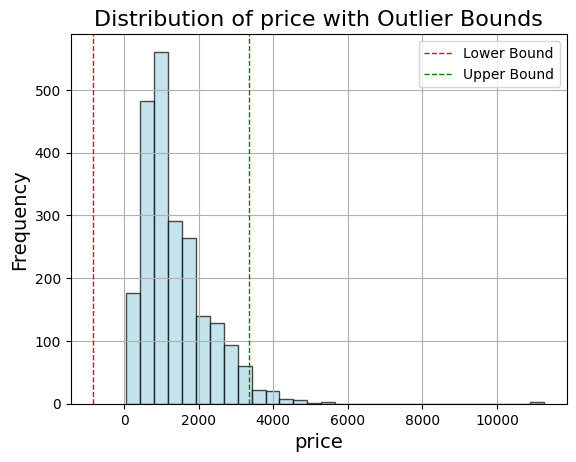

,brand,model,screen_size,color,harddisk,cpu,ram,os,graphics,cpu_speed,rating,price
3,Apple,MacBook Air,13.3,Silver,256.0,Unknown,8.0,Mac OS,Integrated,10.172142,4.800000,689.99
4,Apple,MacBook Air,15.3,Midnight,256.0,Unknown,8.0,Mac OS,Integrated,10.172142,4.800000,1144.48
5,Acer,A315-24P-R7VH,15.6,Silver,128.0,Ryzen 3,8.0,Windows 11 S,Integrated,10.172142,4.500000,299.99
6,Apple,MacBook Pro,13.3,Space Gray,256.0,Unknown,8.0,Mac OS,Integrated,10.172142,4.700000,965.08
7,Acer,CB315-3HT,15.6,Silver,64.0,Celeron N4020,4.0,Chrome OS,Integrated,10.172142,4.400000,239.99
...,...,...,...,...,...,...,...,...,...,...,...,...
4430,Dell,Alienware m16 Laptop,16.0,Black,1000.0,Core i7,64.0,Windows 11 Home,Dedicated,10.172142,4.331453,2100.22
4431,Dell,XPS 9520 Laptop,15.6,Platinum Silver,2000.0,Core i7,32.0,Windows 10 Pro,Dedicated,10.172142,4.331453,2648.99
4433,Dell,Precision 5760 Laptop,17.0,Silver,512.0,Intel Xeon,32.0,Windows 11 Pro,Nvidia RTX A3000,10.172142,4.331453,2785.99
4437,Dell,Latitude 3420 Laptop,14.0,Black,2000.0,Core i5,32.0,Windows 11 Pro,Nvidia GeForce MX250,10.172142,4.331453,1058.99


In [60]:
remove_outliers(df, 'price', plot=True)

After reviewing the data that exceeds the upper limit, we can conclude that there are no errors, because such a high price is associated with their performance, novelty, and type of graphics card.

Перетворення категоріальних змінних у числові
Використовуйте one-hot encoding для категоріальних змінних, якщо це доречно


In [61]:
numeric_columns = ['harddisk', 'screen_size', 'ram', 'cpu_speed', 'rating', 'price']

In [62]:
#categorical_columns = ['brand', 'model', 'color', 'cpu', 'os', 'graphics']
#df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

Обчислюю кореляцію

Значення від -1 до 1. Значення ближче до 1 або -1 вказують на сильну кореляцію. Позитивна кореляція (приблизно 1) означає, що коли одне значення зростає, інше також зростає. Від'ємна кореляція (приблизно -1) означає, що коли одне значення зростає, інше зменшується.

In [63]:
correlation_matrix = df[numeric_columns].corr()

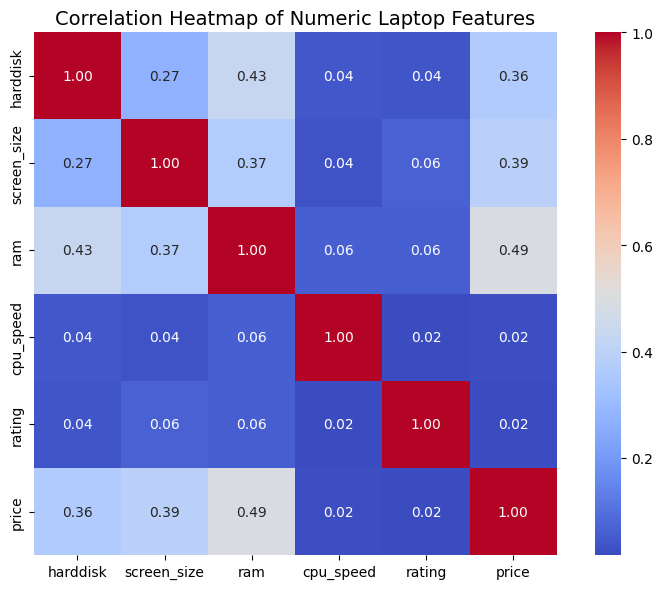

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,     
    cmap='coolwarm',
    fmt=".2f",
    square=True
)
plt.title('Correlation Heatmap of Numeric Laptop Features', fontsize=14)
plt.tight_layout()
plt.show()

harddisk:
screen size - 0.27
ram - 0.43
cpu - 0.04
rating - 0.04
price - 0.36

screen size:
ram - 0.37
cpu - 0.04
rating - 0.06
price - 0.39

ram :
cpu - 0.06 
rating - 0.06
price - 0.49


cpu:
rating - 0.02
price - 0.02

rating:
price - 0.02

Most influential features on price: RAM > Screen Size > Hard Disk.

Spec combinations: High RAM often comes with larger storage, making these laptops more expensive.

CPU speed does not significantly affect price in this dataset.

User ratings cannot be predicted from numeric specs; other factors (brand, design, OS) might play a bigger role.

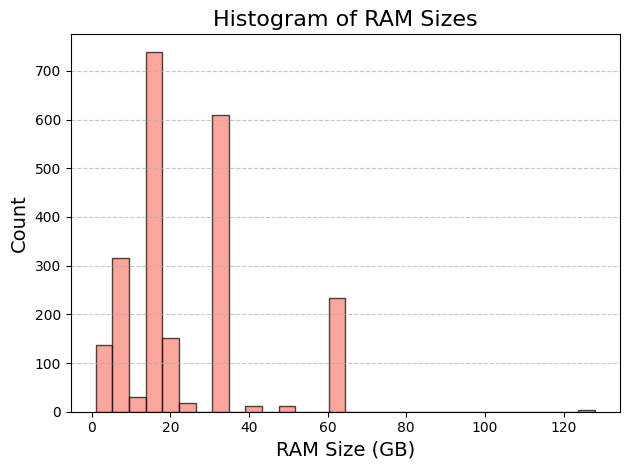

In [70]:
plt.hist(df['ram'].dropna(), bins=30, color='salmon', edgecolor='black', alpha=0.7)
plt.title("Histogram of RAM Sizes", fontsize=16)
plt.xlabel("RAM Size (GB)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


MOre than 700 laptops have RAM 16GB and over 600 have 36GB

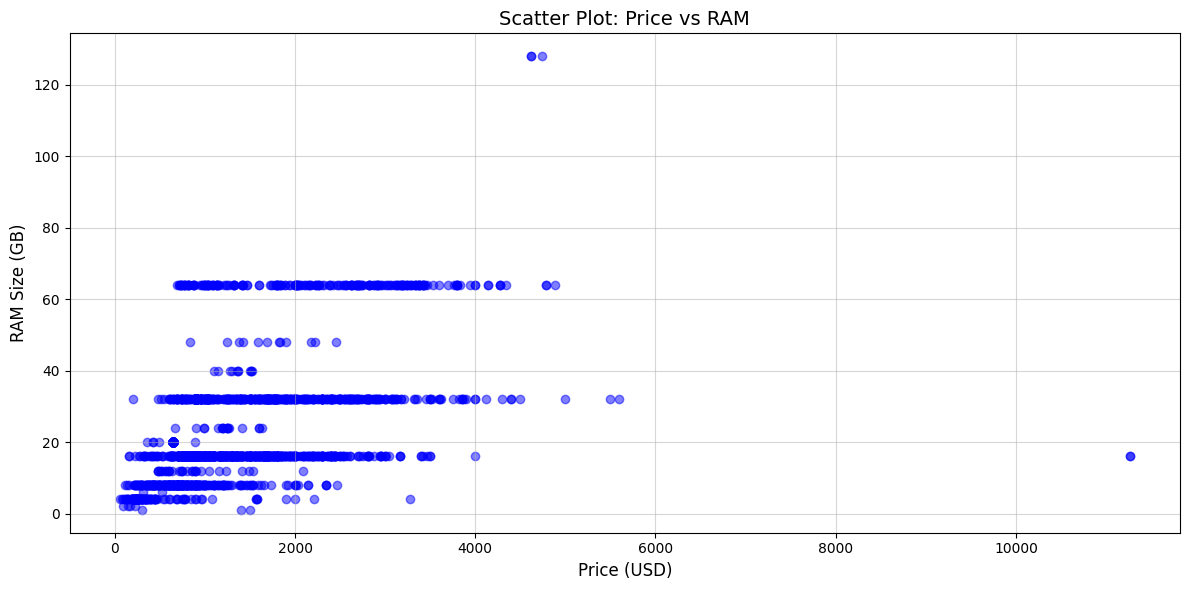

In [72]:
plt.figure(figsize=(12, 6))
plt.scatter(df['price'], df['ram'], alpha=0.5, color='blue')
plt.title("Scatter Plot: Price vs RAM", fontsize=14)
plt.xlabel("Price (USD)", fontsize=12)
plt.ylabel("RAM Size (GB)", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


Higher RAM size - higher price. Exception here is RAM 36. It has the highest price rate

Text(0, 0.5, "Об'єм жорсткого диска (GB)")

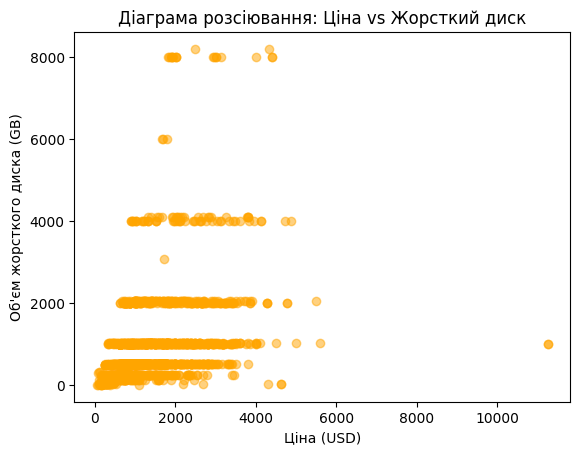

In [ ]:
plt.scatter(df['price'], df['harddisk'], alpha=0.5, color='orange')
plt.title('Діаграма розсіювання: Ціна vs Жорсткий диск')
plt.xlabel('Ціна (USD)')
plt.ylabel('Об\'єм жорсткого диска (GB)')

There’s a mild positive trend: laptops with larger harddisks tend to cost slightly more, but it’s not very strong.

### Price vs Specifications

Observation: Laptop prices vary significantly depending on specifications, such as RAM size and hard disk capacity.
Hypothesis: Laptops with more than 16 GB RAM and hard disks larger than 1 TB will generally have higher prices.

### Price vs Rating

Observation: There is a noticeable correlation between laptop price and user ratings.
Hypothesis: As the price increases, the laptop rating also tends to increase.

### Brand Popularity

Observation: Certain brands appear more frequently in the dataset, suggesting higher market share.
Hypothesis: Brands represented in the dataset are likely to hold a significant portion of the market.

### Screen Size vs Hard Disk Capacity

Observation: Screen size may influence hard disk capacity.
Hypothesis: Laptops with larger screens tend to have higher hard disk capacities, possibly due to higher storage requirements for larger displays and multimedia use.

### Operating System Distribution

Observation: Operating system distribution varies across brands.
Hypothesis: Some brands predominantly come with specific operating systems (e.g., Windows or macOS).